# Model/Dataset Learn Check

In this notebook an overfit to the test data slice is done to check the capability of our model's architecture to learn a specific output image as expected, and to confirm that the test data contains enough information for the network to differentiate between the points.

In [1]:
from model import Model

Load dataset

In [2]:
import torch

# load test input/output data
inputs = torch.load("data/inputs.pt")
outputs = torch.load("data/outputs.pt")

inputs.shape, outputs.shape

(torch.Size([112, 1, 21, 21]), torch.Size([112, 2, 21, 21]))

Inspect one input/output sample

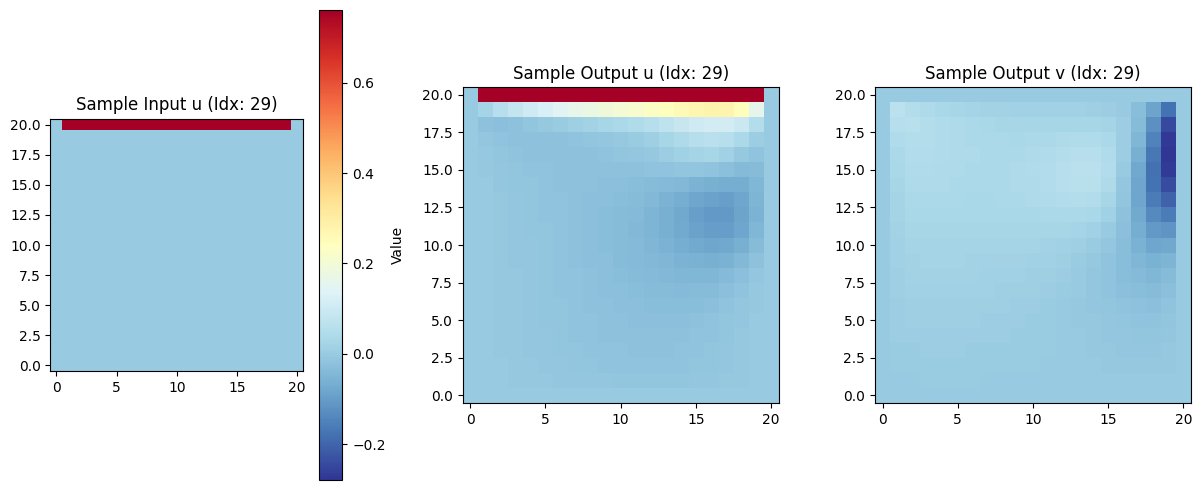

In [11]:
from plotting import plot_data_samples

plot_data_samples(inputs, outputs)


We take 10 random data points and create a loader with them to test the model

In [17]:
import torch

batch_size = 1
n_samples = 10
n_in_channels = 1
n_out_channels = 2

# expected shape within the dataloader/train-loop: (batch_size, n_in_channels, height, width)
random_idxs = torch.randint(0, inputs.shape[0], (n_samples,))
x = inputs[random_idxs, :, :, :]
y = outputs[random_idxs, :, :, :]

# create tensor dataset and dataloader
train_dataset = torch.utils.data.TensorDataset(x, y)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

random_idxs

tensor([ 89,  55,  98, 105,   7,  80,  18,   7,  40,  38])

In [18]:
x.shape, y.shape

(torch.Size([10, 1, 21, 21]), torch.Size([10, 2, 21, 21]))

Instantiate and train the model with the data

In [19]:
model = Model()
model.fit(train_dataloader, learning_rate=0.001, epochs=4000)

Epoch 0, Loss: 0.007596186827868223
Epoch 1, Loss: 0.002590886550024152
Epoch 2, Loss: 0.0022376198321580887
Epoch 3, Loss: 0.001465071807615459
Epoch 4, Loss: 0.0012907182099297643
Epoch 5, Loss: 0.0011232118122279644
Epoch 6, Loss: 0.0008775728638283908
Epoch 7, Loss: 0.0007845349027775228
Epoch 8, Loss: 0.0007012382266111672
Epoch 9, Loss: 0.0005840153899043798
Epoch 10, Loss: 0.0005361920339055359
Epoch 11, Loss: 0.0004629911854863167
Epoch 12, Loss: 0.00043091867701150477
Epoch 13, Loss: 0.00038837071042507887
Epoch 14, Loss: 0.0003583942016121
Epoch 15, Loss: 0.00035832225694321096
Epoch 16, Loss: 0.0006534655694849789
Epoch 17, Loss: 0.0006191873690113425
Epoch 18, Loss: 0.00031088831019587815
Epoch 19, Loss: 0.00026494922349229455
Epoch 20, Loss: 0.0002775038592517376
Epoch 21, Loss: 0.00023743246856611222
Epoch 22, Loss: 0.00022157463536132127
Epoch 23, Loss: 0.00026250630617141724
Epoch 24, Loss: 0.0002862151595763862
Epoch 25, Loss: 0.0001975858467631042
Epoch 26, Loss: 0.00

In [8]:
model.eval()

Model(
  (conv1): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
  (relu): ReLU()
  (hidden): ModuleList(
    (0-4): 5 x Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
  )
  (output_layer): Conv2d(16, 2, kernel_size=(7, 7), stride=(1, 1), padding=same)
)

In [20]:
y_predict = model.forward(x.float()).detach().numpy()
y_predict.shape

(10, 2, 21, 21)

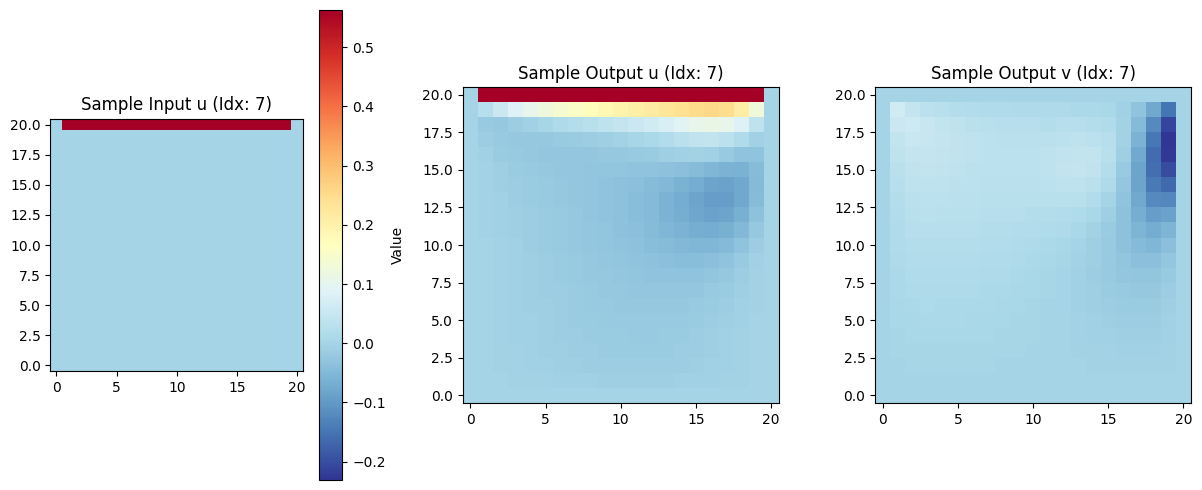

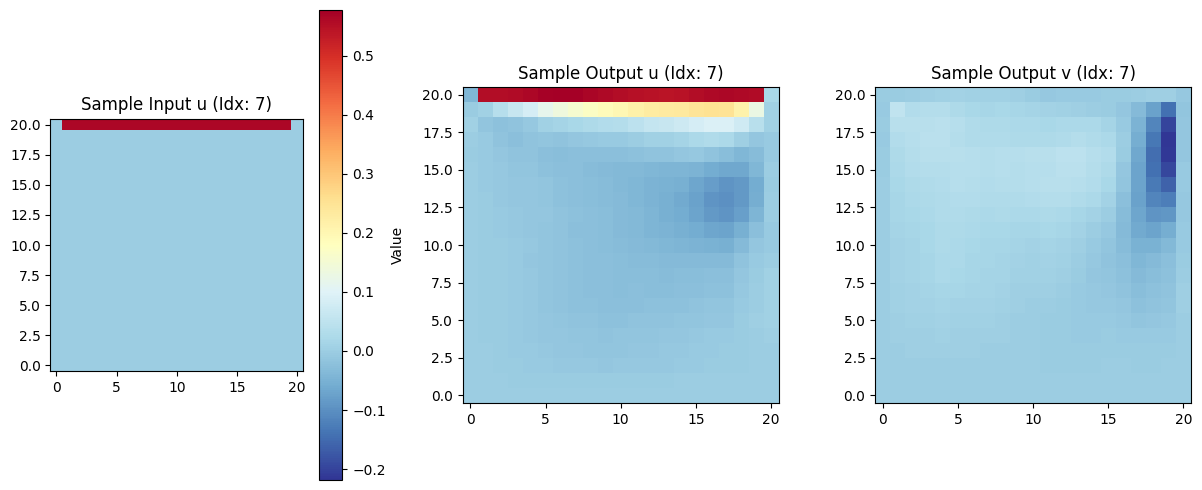

In [22]:
from plotting import plot_data_samples

idx = 7

plot_data_samples(x, y, idx)
plot_data_samples(x, y_predict, idx)